In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
data = pd.read_csv("Dataset of Diabetes .csv")

# Data Description 
The construction of diabetes dataset was explained. The data were collected from the Iraqi society, as they data were acquired from the laboratory of Medical City Hospital and (the Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital). Patients' files were taken and data extracted from them and entered in to the database to construct the diabetes dataset. The data consist of medical information, laboratory analysis. The data attribute are:
The data consist of medical information, laboratory analysis… etc. The data that have been entered initially into the system are: No. of Patient, Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), Urea, Cholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, Triglycerides(TG) and HDL Cholesterol , HBA1C, Class (the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic).

# Steps to reproduce

they are taken 1000 patients and cover three classes (Diabetic, Non-Diabetic, and Predicted-
Diabetic).
Diabetes is an opportune disease which has large wealth of data available and has with it huge complications. There is a need for a better and a more accurate approach in the diagnosis of the disease

In [38]:
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [39]:
data = data.drop('ID', axis=True)

In [40]:
data = data.drop('No_Pation', axis=1)

In [41]:
data.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [8]:
data.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   object 
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 93.9+ KB


In [88]:
data.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [148]:
gender = {'M':0,'F':1}
data['Gender']=data['Gender'].map(gender)

In [13]:
for col_name in data.columns: 
    print(col_name)

Gender
AGE
Urea
Cr
HbA1c
Chol
TG
HDL
LDL
VLDL
BMI
CLASS


## Male and Female data converted to binary value
### Female 1, Male 0.

In [42]:
data.Gender.value_counts()

M    565
F    434
f      1
Name: Gender, dtype: int64

In [43]:
# 'f' has to be converted to 'F' in the Gender column.
for i in range(len(data)):
    if data.at[i,'Gender'] == 'f':
        data.at[i,'Gender'] = 'F'
        
    else:
        pass
    


In [44]:

data.Gender.value_counts()

M    565
F    435
Name: Gender, dtype: int64

In [31]:
data.CLASS.value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [45]:

data['CLASS']= data['CLASS'].map({'N':0, 'Y':1, 'P':2})

In [48]:
new_data = data

In [49]:
new_data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1.0
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,NaN
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,NaN
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,NaN


In [152]:
data = data.drop('CLASS', axis=1)

In [154]:
data.tail(20)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
980,0.0,51,5.5,83,9.4,6.4,2.3,2.3,3.2,1.0,33.0
981,0.0,65,5.0,97,7.0,4.3,4.3,1.4,1.5,2.0,27.0
982,1.0,54,5.0,88,6.8,5.1,2.1,1.1,3.0,1.0,30.0
983,0.0,64,8.8,106,8.5,5.9,2.1,1.2,4.0,1.2,32.0
984,1.0,60,5.0,70,8.1,5.2,3.3,1.4,0.6,3.0,27.0
985,1.0,75,10.3,113,8.6,4.2,1.6,0.9,2.6,0.7,32.0
986,0.0,58,4.0,55,7.9,4.9,2.0,1.2,1.4,1.1,35.0
987,0.0,55,5.4,62,6.8,5.3,2.0,1.0,3.5,0.9,30.1
988,0.0,55,4.8,88,11.1,5.7,4.0,0.9,3.3,1.8,30.0
989,0.0,62,6.3,82,6.7,5.3,2.0,1.0,3.5,0.9,30.1


In [45]:
Class = {'N':0, 'Y':1,'P':2}
data['Class'] = data.CLASS.map(Class)


# or data['Class']= data['Class'].map({'N':0, 'Y':1, 'P':2})

In [51]:
data_2= data.drop('CLASS',axis=True)

In [57]:
new_data = new_data.dropna()

In [58]:
new_data.tail()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
991,0,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,1.0
992,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1.0
993,1,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1.0
994,1,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,1.0
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1.0


In [62]:
new_data.CLASS.value_counts()

1.0    840
0.0    102
2.0     53
Name: CLASS, dtype: int64

In [63]:
new_data.to_csv('clean_data.csv')

<Axes: xlabel='Class', ylabel='count'>

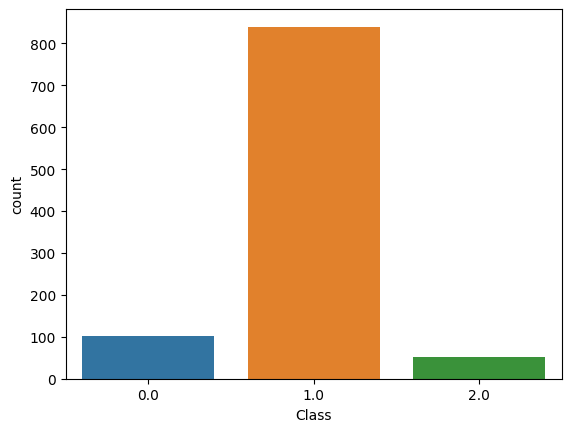

In [64]:
sns.countplot(x="Class", data=data_2)

<Axes: xlabel='AGE', ylabel='count'>

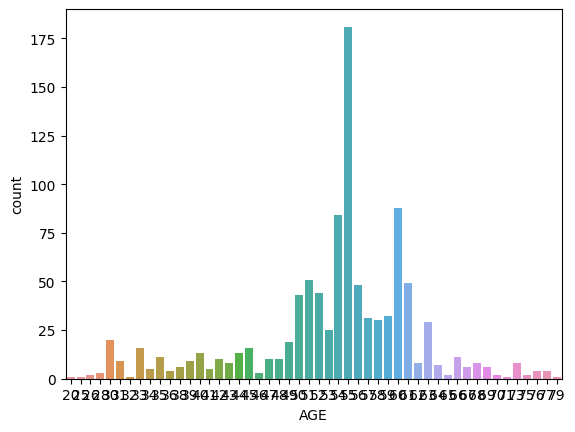

In [66]:
sns.countplot(x="AGE", data=data_2)

In [141]:
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,0.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,0.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,0.0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,0.0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,0.0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [101]:
data['CLASS'] = data['CLASS'].fillna(1)

In [103]:
data['Gender'] = data['Gender'].fillna(1)

###### fill the NaN with Ones

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size= 0.2)

model = LinearRegression()
model.fit(X_train, y_train)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
611,1.0,51,4.2,72,11.2,4.4,2.1,1.1,2.5,0.9,26.0
301,1.0,56,4.0,45,9.2,4.1,0.6,1.3,1.4,0.9,30.0
553,0.0,51,3.2,49,6.7,4.6,1.2,1.3,2.8,0.5,34.0
780,1.0,60,4.4,49,12.3,4.6,2.3,0.9,3.6,2.0,38.0
581,0.0,54,6.8,73,7.5,5.1,2.0,1.3,1.4,1.5,39.0
...,...,...,...,...,...,...,...,...,...,...,...
640,0.0,51,3.9,53,10.9,3.6,1.1,0.8,2.3,1.0,29.0
311,1.0,56,5.5,48,9.3,5.8,2.4,0.9,3.9,1.1,30.0
592,1.0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,36.6
299,0.0,55,5.4,85,9.7,5.2,1.8,1.3,3.2,0.8,30.0


In [130]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [125]:
X_train = X.iloc[X_train]

In [139]:
X_test.shape

(200,)

In [137]:
model.score(X_test,y_test) *100

/home/gershon/Documents/Miriam_Project/code/AI_dietician/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[326. 154. 341. 991. 859. 892. 992. 509. 597. 344. 533. 113. 662. 715.
 300.  81. 389. 737. 148. 129. 944. 201. 803. 885. 869. 710. 427.  88.
 173. 670. 752. 404. 562. 476. 522. 395. 321. 686. 436. 200.  87. 324.
 704.  74. 421. 376. 287. 445. 845. 537. 573. 695. 143. 564. 233. 861.
 559. 221. 627. 347. 883. 391. 251. 289. 488. 234. 438. 647. 265. 849.
 231. 708. 260. 475. 451. 767. 134. 893.  77. 237. 215. 681. 227. 314.
 724. 565. 446. 680. 235. 284.  82.  99. 642. 806. 453. 583.  47. 114.
 112. 899. 454. 557.  91. 687. 665. 467. 945. 999. 696. 252. 432. 599.
 165. 137. 917.  94. 407. 728. 549. 976. 713. 654. 621. 352. 771. 261.
 125. 983. 175. 868. 718. 960. 745. 653.  24. 768. 928. 774. 502. 459.
  34. 516. 269. 644. 312. 250. 747. 214. 626. 468. 777. 378. 248. 730.
  45. 357. 817. 447. 787. 185. 738. 538. 338. 847. 256. 591. 649. 867.
 574. 719. 701. 570. 513. 641. 877. 415. 507. 497. 443. 723. 192. 946.
 791. 110. 714. 510. 355.  83. 770. 926. 437. 853. 499. 478. 410. 951.
 691.  43. 239. 620.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
model.score(X_test,y_test) *100